## Clustering with points

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

data = np.array([[1,2], [5,8], [1.5,1.8], [8,8], [1,0.6], [9,11]])

kmeans = KMeans(n_clusters=2)

kmeans.fit(data)


centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("centroids")
print(centroids)
print("labels")
print(labels)


centroids
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
labels
[1 0 1 0 1 0]


## Clustering with dataset

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset/Countryclusters.csv")

data



,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


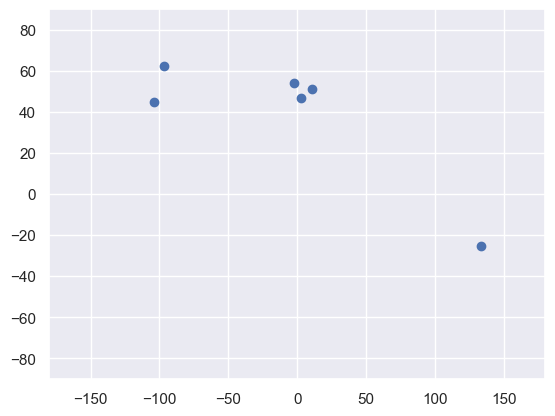

In [15]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [18]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [20]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

Results

In [21]:
identified_clusters  = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

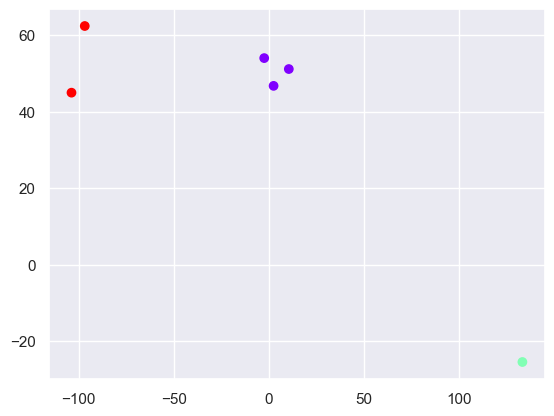

In [22]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')

Elbow method

wcss will store the within-cluster sum of squares (WCSS) for each number of clusters.

The kmeans.inertia_ attribute in scikit-learn's KMeans clustering algorithm represents the within-cluster sum of squared distances to the nearest cluster centroid. It is also known as the "inertia" of the KMeans model.

Text(0, 0.5, 'WCSS')

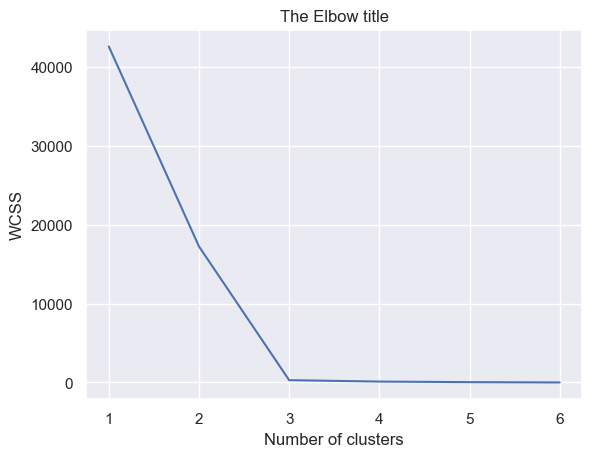

In [24]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')